<a href="https://colab.research.google.com/github/rccrdmr/MAT422-Mathematics-for-DataScience/blob/main/3.7_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.7 Neural Networks

Aritficial neural networks is a connection of layers of units or nodes to loosely model the neurons in a biological brain. In this section, we illustrate the use of differentiation for training artificial neural networks to minimize cost functions.

### 3.7.1 Mathematical Formulation

In a basic neural network, as shown below, we have two input nodes $x_1$ and $x_2$, which are fed into an intermediate layer to compute the output $\hat{y}$.

$$
\hat{y} = \sigma(z) = \sigma(w_1 a_1 + w_2 a_2 + b)
$$

where:
- $\sigma$ is the activation function applied to the weighted sum,
- $w_1$ and $w_2$ are weights assigned to the inputs $a_1$ and $a_2$, and
- $b$ is the bias term, added to allow for more flexible fitting of the data.


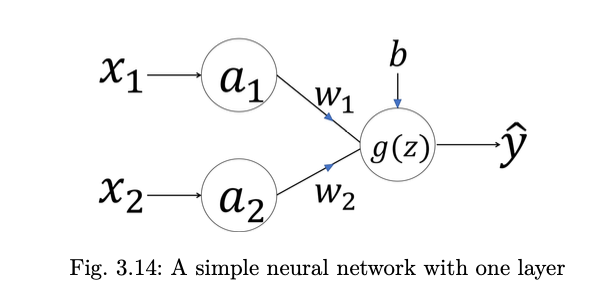

This configuration, though basic, forms the foundation of more complex networks by adjusting weights $w_i$ and bias $b$ to better align the predicted output $\hat{y}$ with the actual target data.


#### General Neural Network (Multi-Layer)

In more complex neural networks, there are multiple layers, as illustrated below. Each layer consists of many nodes, connected to all nodes in the previous layer through weighted connections. These connections allow information to be transformed in non-linear ways as it passes through each layer. Such networks, with potentially thousands of nodes, enable the model to learn and represent more complex patterns in the data.


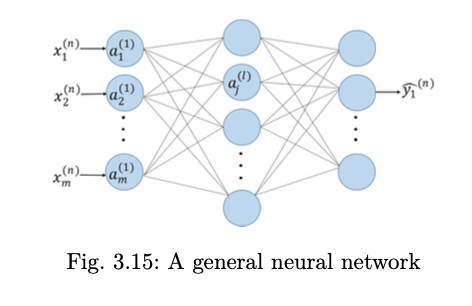

In this structure:
- **Input Units** receive information from various sources,
- **Hidden Layers** transform the input data through a series of weights and biases, and
- **Output Layer** provides the final result of the neural network.

Each node in a layer performs a weighted sum of inputs from the previous layer, applies an activation function, and passes the result to the next layer. Through iterative training, the network adjusts these weights to minimize error and produce output increasingly closer to the target.

#### Detailed Mathematical Formulation


The process of calculating the values in each layer based on the previous layer is shown below. For a given layer $l$, each node in that layer receives a weighted sum of the activations from the previous layer $l-1$.

The value going into node $j'$ in layer $l$ is calculated as:
$$
z^{(l)}_{j'} = \sum_{j=1}^{J_{l-1}} w^{(l)}_{j, j'} a^{(l-1)}_j + b^{(l)}_{j'}
$$
where:
- $w^{(l)}_{j, j'}$ represents the weight from node $j$ in layer $l-1$ to node $j'$ in layer $l$,
- $a^{(l-1)}_j$ is the activation of node $j$ in layer $l-1$, and
- $b^{(l)}_{j'}$ is the bias term for node $j'$ in layer $l$.

Once $z^{(l)}_{j'}$ is computed, an activation function $\sigma$ is applied to obtain the final activation for node $j'$ in layer $l$:
$$
a^{(l)}_{j'} = \sigma(z^{(l)}_{j'})
$$

In matrix form, we can represent the calculations for all nodes in layer $l$ as:
$$
z^{(l)} = W^{(l)} a^{(l-1)} + b^{(l)}
$$
where:
- $W^{(l)}$ is the weight matrix connecting layer $l-1$ to layer $l$,
- $a^{(l-1)}$ is the vector of activations from layer $l-1$, and
- $b^{(l)}$ is the bias vector for layer $l$.

The output of layer $l$ is:
$$
a^{(l)} = \sigma(z^{(l)}) = \sigma(W^{(l)} a^{(l-1)} + b^{(l)})
$$

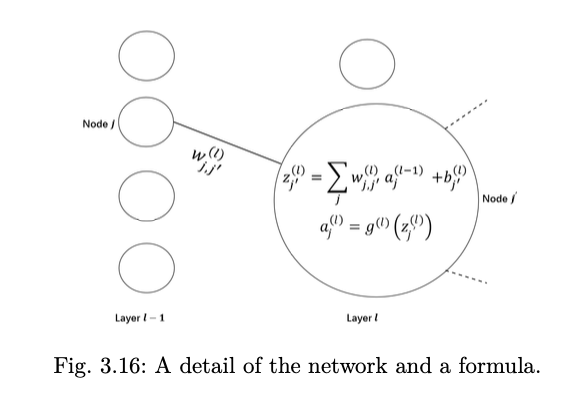

This mathematical formulation captures the core mechanism of neural networks, where successive layers of transformations allow the network to approximate complex functions and patterns, learning from data through the iterative adjustment of weights and biases.


### 3.7.2 Activation Functions

In neural networks, the activation function defines the output of each node given an input or set of inputs, enabling the network to make non-linear transformations. Activation functions are denoted by $\sigma$ and are applied uniformly across nodes in a layer. For each layer $l$, the activation function transforms the input $z^{(l)}$ as follows:

$$
a^{(l)} = \sigma(z^{(l)}) = \sigma(W^{(l)} a^{(l-1)} + b^{(l)})
$$

Below are some commonly used activation functions.


#### 3.7.2.1 Step Function


The step function, also known as the Heaviside or unit step function, is defined as:
$$
\sigma(x) =
\begin{cases}
0, & x < 0 \\
1, & x \geq 0
\end{cases}
$$
This function represents a signal that switches on at a certain threshold and remains active indefinitely. It is often used for binary classification tasks where the output is either 0 or 1.


#### 3.7.2.2 ReLU (Rectified Linear Unit) Function


The ReLU function is widely used due to its simplicity and effectiveness, particularly in deep neural networks. It is defined as:
$$
\sigma(x) = \max(0, x)
$$
ReLU allows only positive signals to pass through, setting any negative input to zero. This function was found to accelerate the training of deep networks, as it enables faster and more effective training on large, complex datasets by avoiding the vanishing gradient problem associated with other activation functions.


#### 3.7.2.3 Sigmoid Function


The sigmoid, or logistic function, is used in many fields, including biostatistics. It maps input values to a range between 0 and 1, which is useful for interpreting outputs as probabilities. The function is defined as:
$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$
The sigmoid function is often used in the output layer for binary classification tasks, as it squashes values to a range conducive to probability-based interpretation.


#### 3.7.2.4 Softmax Function


The softmax function converts an array of values into a probability distribution. Given a vector of $K$ values, it produces an output where each value is a probability proportional to the relative scale of the input values. The softmax function is defined as:
$$
\sigma(z_k) = \frac{e^{z_k}}{\sum_{j=1}^K e^{z_j}}
$$
Softmax is commonly used in the output layer of neural networks for multi-class classification problems, as it allows the network to output a probability distribution across multiple classes.


### 3.7.3 Cost Function

The cost function in neural networks quantifies the difference between the predicted outputs and the actual outputs, providing a measure of error. By minimizing this function, the network learns to adjust its parameters to improve its accuracy.


#### Mean Squared Error (MSE) for Regression

For regression tasks, one common cost function is the Mean Squared Error (MSE). Given a set of true output values $y^{(n)}$ and predicted values $\hat{y}^{(n)}$, the MSE is defined as:
$$
J = \frac{1}{2} \sum_{n=1}^{N} \sum_{k=1}^{K} \left( \hat{y}^{(n)}_k - y^{(n)}_k \right)^2
$$
where:
- $N$ is the total number of samples,
- $K$ is the number of output nodes,
- $\hat{y}^{(n)}_k$ is the predicted value for the $k$-th output of the $n$-th sample, and
- $y^{(n)}_k$ is the true value for the $k$-th output of the $n$-th sample.


#### Cross-Entropy Loss for Classification


For binary classification tasks, where the target values are either 0 or 1, the commonly used cost function is the binary cross-entropy loss. This is especially useful for outputs interpreted as probabilities. For a binary classification task where $y^{(n)}$ represents the true label (0 or 1), the cross-entropy loss is defined as:
$$
J = -\sum_{n=1}^{N} \left( y^{(n)} \ln \hat{y}^{(n)} + (1 - y^{(n)}) \ln (1 - \hat{y}^{(n)}) \right)
$$
This function penalizes large discrepancies between the predicted probability $\hat{y}^{(n)}$ and the true label $y^{(n)}$, resulting in better performance in binary classification tasks.

For multi-class classification problems, the cost function generalizes to the categorical cross-entropy loss, often used with the softmax activation function in the output layer.


#### Relation to Gradient Descent


The cost function provides a metric that gradient descent seeks to minimize. During training, gradient descent adjusts the weights and biases in the network by calculating the partial derivatives of the cost function with respect to each parameter and updating them in the opposite direction of the gradient. This iterative process reduces the cost function value, effectively decreasing the error over time.


### 3.7.4 Backpropagation

Backpropagation is a technique used to train neural networks by minimizing the cost function $J$. The goal is to adjust the network’s weights and biases to reduce the error and improve accuracy. To achieve this, we compute how the cost function $J$ changes with respect to each weight $w$ and bias $b$ in the network.

**Key Concept: Error Signal $\delta$**

To simplify the calculations, we introduce an "error signal" for each node, represented by $\delta$. Specifically, for each node $j'$ in layer $l$, we define:
$$
\delta^{(l)}_{j'} = \frac{\partial J}{\partial z^{(l)}_{j'}}
$$
where $z^{(l)}_{j'}$ is the weighted input to node $j'$ in layer $l$. This $\delta^{(l)}_{j'}$ tells us how the cost function changes with respect to $z^{(l)}_{j'}$, helping us determine the adjustments needed in earlier layers.

**Step 1: Propagating Error Backwards**

Using the chain rule, we can calculate the error for nodes in layer $l-1$ (the previous layer) based on the error in layer $l$. For node $j$ in layer $l-1$, the error $\delta^{(l-1)}_j$ is calculated as:
$$
\delta^{(l-1)}_j = \sum_{j'} \delta^{(l)}_{j'} w^{(l)}_{j, j'}
$$
Here, we sum over all connections from nodes in layer $l-1$ to layer $l$, weighted by the respective weights $w^{(l)}_{j, j'}$.

**Step 2: Calculating Weighted Input**

The weighted input $z^{(l)}_{j'}$ for node $j'$ in layer $l$ is computed by summing up the weighted activations from the previous layer:
$$
z^{(l)}_{j'} = \sum_{j} w^{(l)}_{j, j'} a^{(l-1)}_j + b^{(l)}_{j'}
$$
where $a^{(l-1)}_j$ is the activation from the previous layer $l-1$.

**Step 3: Expressing $\delta^{(l-1)}_j$**

Using the activation function’s derivative $\sigma'$, we can rewrite $\delta^{(l-1)}_j$ as:
$$
\delta^{(l-1)}_j = \sigma'(z^{(l-1)}_j) \sum_{j'} \delta^{(l)}_{j'} w^{(l)}_{j, j'}
$$
This expression allows us to compute $\delta$ for each layer, moving backwards through the network from the output layer to the input layer.

**Step 4: Calculating Derivatives with Respect to Weights and Biases**

Now that we have $\delta$ values, we can calculate the partial derivatives of $J$ with respect to weights and biases:

- For weights:
  $$
  \frac{\partial J}{\partial w^{(l)}_{j, j'}} = \delta^{(l)}_{j'} a^{(l-1)}_j
  $$
  This shows that the change in $J$ with respect to a weight depends on the error $\delta^{(l)}_{j'}$ at the current layer and the activation $a^{(l-1)}_j$ from the previous layer.

- For biases:
  $$
  \frac{\partial J}{\partial b^{(l)}_{j'}} = \delta^{(l)}_{j'}
  $$
  This indicates that the change in $J$ with respect to a bias depends solely on the error at the current layer.

**Final Adjustments**

These derivatives allow us to adjust weights and biases using gradient descent, by moving in the direction that reduces the cost function $J$. The network iteratively updates each weight and bias to improve performance.

**Activation Function Derivatives**

The choice of activation function affects the backpropagation process:
- For ReLU, the derivative is either zero or one.
- For the logistic (sigmoid) function, the derivative is:
  $$
  \sigma'(z) = \sigma(z) (1 - \sigma(z))
  $$

Backpropagation thus calculates these gradients layer by layer, propagating errors backward and refining weights and biases to improve accuracy.


### 3.7.5 Backpropagation Algorithm

The backpropagation algorithm trains neural networks by adjusting weights and biases to minimize prediction errors. Here's the step-by-step process:

1. **Initialize**: Start with random weights and biases across all network layers

2. **Forward Pass** (Prediction):
  - Input: Feed vector $x$ into the network
  - Propagate: Calculate layer activations $a_j$ and outputs $z_j$
  - Output: Get final prediction $\hat{y}$

3. **Backward Pass** (Error Calculation):
  Starting at output layer (for quadratic cost function):
  $\delta^{(L)} = \frac{dg^{(L)}}{dz}|_{z_j^{(L)}}(\hat{y} - y)$

  Then propagate error backwards through each layer $(l-1)$:
  $\delta_j^{(l-1)} = \frac{dg^{(l-1)}}{dz}|_{z_j^{(l-1)}} \sum_j \delta_j^{(l)} w_{j,j'}^{(l)}$

4. **Update Parameters** (Gradient Descent):
  Weights: Adjust based on error and activations
  $w_{j,j'}^{(l)_{\text{new}}} = w_{j,j'}^{(l)_{\text{old}}} - \beta \delta_j^{(l)} a_j^{(l-1)}$

  Biases: Adjust based on error
  $b_j^{(l)_{\text{new}}} = b_j^{(l)_{\text{old}}} - \beta \delta_j^{(l)}$

  where $\beta$ is the learning rate controlling update step size

5. **Iterate**: Repeat steps 2-4 for each training example until convergence

Key Insights:
- Information flows forward during prediction, errors flow backward during learning
- Each layer's error is computed using the next layer's error (chain rule)
- Updates are proportional to how much each parameter contributed to the error
- Learning rate $\beta$ balances between fast learning (high) and stability (low)

### Demo

In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

#### Define Neural Network

In [32]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)  # First convolutional layer
        self.conv2 = nn.Conv2d(6, 16, 5)  # Second convolutional layer
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # First fully connected layer
        self.fc2 = nn.Linear(120, 84)  # Second fully connected layer
        self.fc3 = nn.Linear(84, 10)  # Output layer

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
print(net)


Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [33]:
print("Network Architecture:")
print(net)

params = list(net.parameters())
print("\nNumber of parameters:", len(params))
print("Size of the first parameter set:", params[0].size())

Network Architecture:
Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

Number of parameters: 10
Size of the first parameter set: torch.Size([6, 1, 5, 5])


### Forward Pass

In [34]:
input = torch.randn(1, 1, 32, 32)  # Create a random input tensor with batch size 1
out = net(input)
print("Output from the forward pass:")
print(out)

Output from the forward pass:
tensor([[-0.0291,  0.0546,  0.0950, -0.0466,  0.0568, -0.0443, -0.0097, -0.0060,
         -0.1063,  0.0271]], grad_fn=<AddmmBackward0>)


### Loss Function

In [35]:
target = torch.randn(10).view(1, -1)  # Dummy target with the same shape as output
criterion = nn.MSELoss()  # MSE Loss

output = net(input)
loss = criterion(output, target)
print("Initial loss:", loss.item())

Initial loss: 1.0952064990997314


### Backpropagation

In [36]:
# Zero the gradients
net.zero_grad()
print("conv1.bias.grad before backward pass:", net.conv1.bias.grad)

# Backpropagation
loss.backward()
print("conv1.bias.grad after backward pass:", net.conv1.bias.grad)


conv1.bias.grad before backward pass: None
conv1.bias.grad after backward pass: tensor([-0.0071, -0.0165,  0.0047, -0.0127, -0.0218, -0.0021])


### Manual Weight Update (Using Learning Rate)

In [37]:
learning_rate = 0.01
for param in net.parameters():
    param.data.sub_(param.grad.data * learning_rate)

### Optimizer for Weight Updates

In [38]:
import torch.optim as optim

# Optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# Training
optimizer.zero_grad()  # Clear existing gradients
output = net(input)    # Forward pass
loss = criterion(output, target)  # Compute loss
loss.backward()  # Backpropagation
optimizer.step()  # Update weights

### Training Loop & Loss Visualization

Epoch [1/20], Loss: 1.0278
Epoch [2/20], Loss: 0.9977
Epoch [3/20], Loss: 0.9669
Epoch [4/20], Loss: 0.9356
Epoch [5/20], Loss: 0.9034
Epoch [6/20], Loss: 0.8698
Epoch [7/20], Loss: 0.8346
Epoch [8/20], Loss: 0.7970
Epoch [9/20], Loss: 0.7574
Epoch [10/20], Loss: 0.7150
Epoch [11/20], Loss: 0.6667
Epoch [12/20], Loss: 0.6154
Epoch [13/20], Loss: 0.5618
Epoch [14/20], Loss: 0.5047
Epoch [15/20], Loss: 0.4462
Epoch [16/20], Loss: 0.3864
Epoch [17/20], Loss: 0.3270
Epoch [18/20], Loss: 0.2700
Epoch [19/20], Loss: 0.2177
Epoch [20/20], Loss: 0.1707


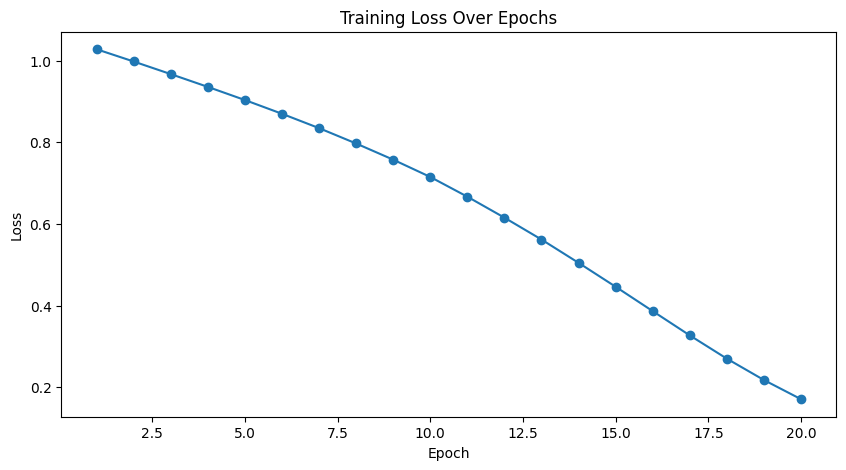

In [39]:
num_epochs = 20
learning_rate = 0.01
loss_history = []

optimizer = optim.SGD(net.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    optimizer.zero_grad()  # Clear gradients
    output = net(input)  # Forward pass
    loss = criterion(output, target)  # Compute loss
    loss.backward()  # Backpropagation
    optimizer.step()  # Update weights

    loss_history.append(loss.item())
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Training loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), loss_history, marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.show()


The plot above shows the loss reduction as the model trains over multiple epochs. A decreasing loss indicates that the model is learning and adjusting its weights to better fit the training data.